**End to End ML Model development**

- Problem Definition
    
- Data Collection
    
- Data Preprocessing
    
- Exploratory Data Analysis (EDA)
    
- Feature Selection and Feature scaling
    
- Model Selection and Training

- Assumptions Check
    
- Model Evaluation
    
- Save the model

**1. Problem Definition**

predicting house prices based on various features like size, location, number of rooms, etc.

In [4]:
import sklearn
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 'base',
 'clone',
 'config_context',
 'datasets',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'logger',
 'logging',
 'os',
 'preprocessing',
 'random',
 'set_config',
 'setup_module',
 'show_versions',
 'sys',
 'utils']

In [3]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

**2.Data Collection**

Collect the data relevant to the problem. This could be from a CSV file, a database, or an API.

In [5]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [6]:
input_data=fetch_california_housing()['data']

In [7]:
description=fetch_california_housing()['DESCR']

In [8]:
output_data=fetch_california_housing()['target']
len(output_data)

20640

In [9]:
target_feature=fetch_california_housing()['target_names']
target_feature

['MedHouseVal']

In [10]:
input_features=fetch_california_housing()['feature_names']
input_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
input_data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [12]:
len(input_data[0]), len(input_features)

(8, 8)

In [13]:
import pandas as pd

In [14]:
housing_df=pd.DataFrame()

In [15]:
housing_df[input_features]=input_data

In [16]:
housing_df['MedHouseVal']=output_data
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Step-3**

**Feature selection-Feature scaling**

**Lets do a drill**

- Task-1:Scale the data , then do the VIF

- Task-2:First do VIF , then Scale the data

**Task-1**

whenever you scale the data exclude the Target column

In [17]:
# Check for missing values
#print(housing_df.isnull().sum())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing_df.drop('MedHouseVal', axis=1))
scaled_features

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [18]:
# Create a new DataFrame with scaled features
# data_scaled =pd.DataFrame()
# data_scaled[input_features]=
# data_scaled['MedHouseVal']=output_data
# data_scaled 
data_scaled = pd.DataFrame(scaled_features, columns=housing_df.columns[:-1])
data_scaled['MedHouseVal'] = housing_df['MedHouseVal']

data_scaled.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

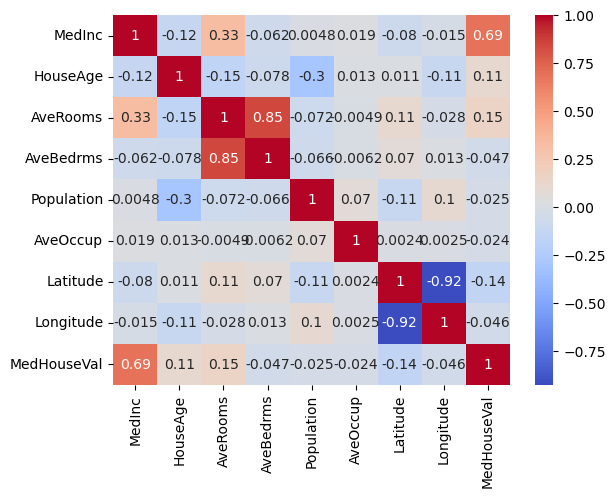

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the correlation matrix
corr_matrix = data_scaled.corr()
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


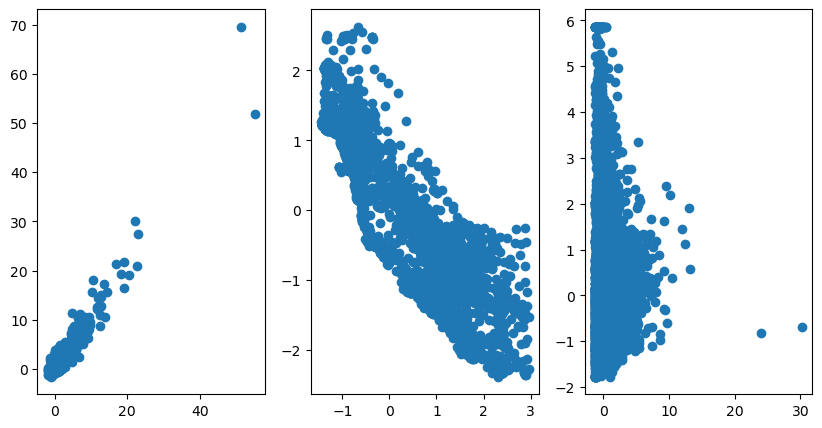

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1).scatter(data_scaled['AveRooms'],data_scaled['AveBedrms'])
plt.subplot(1,3,2).scatter(data_scaled['Latitude'],data_scaled['Longitude'])
plt.subplot(1,3,3).scatter(data_scaled['Population'],data_scaled['MedInc'])


**VIF calculation**

- Every time one input variable behave as output 

- we will get R_Square value

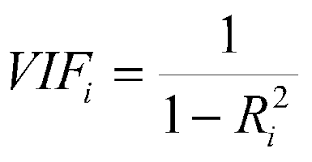

- scaled data we are considering 

- VIF will calculate on Input columns

- so that we will drop the target column : **MedHousVal**

In [17]:
data_scaled.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_scaled.drop('MedHouseVal', axis=1)
X.shape[1]
for i in range(len(X.columns)):
    print(variance_inflation_factor(X.values,i))



2.5012945125415973
1.2412541182182897
8.342785615374497
6.994994771360948
1.1381250818336017
1.008324448980445
9.297624369314345
8.96226347381992


In [19]:
X.values

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [22]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_scaled.drop('MedHouseVal', axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


VIF ranges

- 0 to 5

- 5 to 10

- Morethan 10

- First we taken original data

- then we perform Scaling

- then we apply VIF

**Task-2**

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

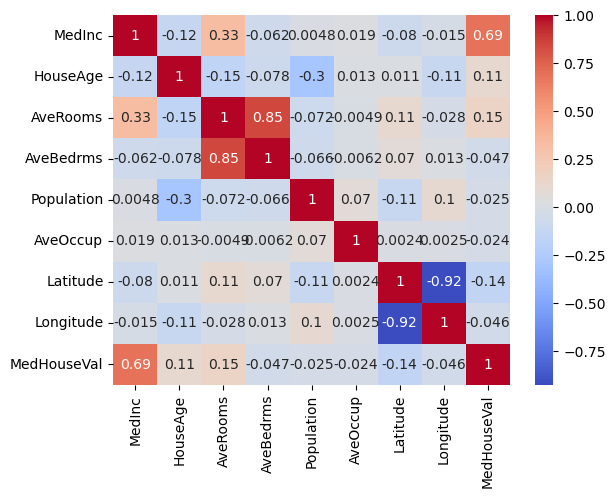

      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the correlation matrix
corr_matrix = housing_df.corr()
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Calculate VIF for each feature
X = housing_df.drop('MedHouseVal', axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


Variance Inflation Factor (VIF) is used to detect multicollinearity among the features in a dataset. 
It is calculated based on the linear relationships between the features, which means the scale of the features can affect the VIF values. 
However, in practice, it is usually acceptable to calculate VIF on the original, unscaled data.

If you decide to scale the data before calculating VIF, 
it will ensure that all features are on the same scale, which can be particularly important if your features have vastly different units or magnitudes.
Standardization (scaling) can sometimes make the interpretation of VIF easier and more consistent.

- Recommended Approach

    - Check for multicollinearity (VIF) before scaling.
    
    - Scale the data (if necessary) for model training and evaluation.

In [22]:
vif_data['VIF']
con=vif_data['VIF']<15
vif_data[con]
vif_data[vif_data['VIF']<15]['feature']
features_to_keep=vif_data[vif_data['VIF']<15]['feature'].to_list()
features_to_keep

['MedInc', 'HouseAge', 'Population', 'AveOccup']

In [23]:
# Define a threshold for VIF
vif_threshold = 15

# Create a list of features to keep
features_to_keep = vif_data[vif_data['VIF'] < vif_threshold]['feature'].tolist()

# Reduce the dataset to the selected features
X_reduced = X[features_to_keep]

print(f"Selected features: {features_to_keep}")


Selected features: ['MedInc', 'HouseAge', 'Population', 'AveOccup']


## we concluded 4 columns get these columns data from main dataframe : housing_df

In [24]:
housing_df_new=housing_df[features_to_keep+['MedHouseVal']]
housing_df_new

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,8.3252,41.0,322.0,2.555556,4.526
1,8.3014,21.0,2401.0,2.109842,3.585
2,7.2574,52.0,496.0,2.802260,3.521
3,5.6431,52.0,558.0,2.547945,3.413
4,3.8462,52.0,565.0,2.181467,3.422
...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,0.781
20636,2.5568,18.0,356.0,3.122807,0.771
20637,1.7000,17.0,1007.0,2.325635,0.923
20638,1.8672,18.0,741.0,2.123209,0.847


## Now scale the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features=scaler.fit_transform(housing_df[features_to_keep])
scaled_features

array([[ 2.34476576,  0.98214266, -0.9744286 , -0.04959654],
       [ 2.33223796, -0.60701891,  0.86143887, -0.09251223],
       [ 1.7826994 ,  1.85618152, -0.82077735, -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.3695372 , -0.0717345 ],
       [-1.05458292, -0.84539315, -0.60442933, -0.09122515],
       [-0.78012947, -1.00430931, -0.03397701, -0.04368215]])

In [26]:
# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=features_to_keep)
data_scaled['MedHouseVal'] = housing_df['MedHouseVal']
data_scaled.head()

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,2.344766,0.982143,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.861439,-0.092512,3.585
2,1.782699,1.856182,-0.820777,-0.025843,3.521
3,0.932968,1.856182,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,-0.759847,-0.085616,3.422


In [1]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
droped_features= features_to_keep+target_feature
scaled_features = scaler.fit_transform(housing_df.drop(droped_features, axis=1))
scaled_features
# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(scaled_features, columns=features_to_keep)
data_scaled['MedHouseVal'] = housing_df['MedHouseVal']

data_scaled.head()


NameError: name 'features_to_keep' is not defined

- we will divide the data into input and output

- we will divide the data tran and test X_train,X_test,y_train, y_test

- Model will develop by pass X_train and y_train

- Model will give predictions by passing X_test is called y_pred

- Now y_pred compare with y_test

**Step-4**

**Divide the data into Input(X) and output(y)**

In [28]:
X = data_scaled.drop('MedHouseVal', axis=1)
y = data_scaled['MedHouseVal']

**Step-5**
**Divide the data into train test split**

**Package name: sklearn**

**class name: model selection**

**Method name: train test split**

- It will divide into train data and test data

- It takes X and y, it will give X_train, X_test, y_train and y_test

- It is also takes the split ratio as **test_size**

- test_size=0.2 means 20% data test data 80% data train data

- if we dont give by default it takes as 25% (0.25)

- It is also asks how you want to split the data?

- generally we will split the data randomly 

- that is argument name : **random_state**


- X

- y

- test_size

- random_state

In [29]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


**QuickChecks**

**Check point 1**

- Original data shape

- X_train shape and X_test shape

- Check the rows and columns

In [30]:
data_scaled.shape  #  (rows,col=5)

#80*(20640)/100
X_train.shape   #(16512,4)
data_scaled.shape,X_train.shape,X_test.shape

((20640, 5), (16512, 4), (4128, 4))

**Check point-2**

X_train rows should match with y_train rows count

X_test rows should match with y_test rows count

In [31]:
data_scaled.shape,X_train.shape,y_train.shape

((20640, 5), (16512, 4), (16512,))

In [32]:
data_scaled.shape,X_test.shape,y_test.shape

((20640, 5), (4128, 4), (4128,))

**Check point -3**

read the X_train and y_train and check the index

In [33]:
X_train.head()

,MedInc,HouseAge,Population,AveOccup
17595,0.249343,0.038149,0.785682,-1.158131
6073,1.043415,-0.070727,-0.731243,0.858357
6251,-0.314361,-0.392871,-0.745288,0.798462
3161,-0.517209,-0.433712,-0.188146,0.359227
1887,0.522533,0.890742,1.539462,-0.204791


In [34]:
y_train

17595    2.35200
6073     5.00001
6251     1.63300
3161     0.68000
1887     0.86900
          ...   
8222     0.87500
9449     1.11100
8471     1.80500
17048    4.95900
1318     2.05100
Name: MedHouseVal, Length: 16512, dtype: float64

**Step-6**

**Model development**

model develop by only train data

X_train and y_train

**package name: sklearn**

**class name: linear_model**

**method_name : LinearRegression**

In [35]:
from sklearn.linear_model import LinearRegression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Step-7**

**Model predictions**

In [37]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred

array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

**Step-8-Check Assumptions of Linear Regression**

- Linearity (features)

- Independence of errors (errors)

- Homoscedasticity(errors)

- Normality of residuals(errors)

- Multicollinearity(features)

**Linearity**


**Definition:**

 - The relationship between the independent variables (features) and the dependent variable (target) should be linear.

**Why it's important:**

 - Linear regression assumes that changes in the dependent variable are directly proportional to changes in the independent variables. If this assumption is violated, the model might miss patterns in the data, leading to poor predictive performance.

**How to check:**

 - **Scatter Plots: 
    
   - Plot the dependent variable against each independent variable. The relationship should look linear.

- **Residual Plots:** 
    
  - Plot the residuals (errors) against the predicted values.
  - There should be no discernible pattern;
  - the points should be randomly scattered around zero.

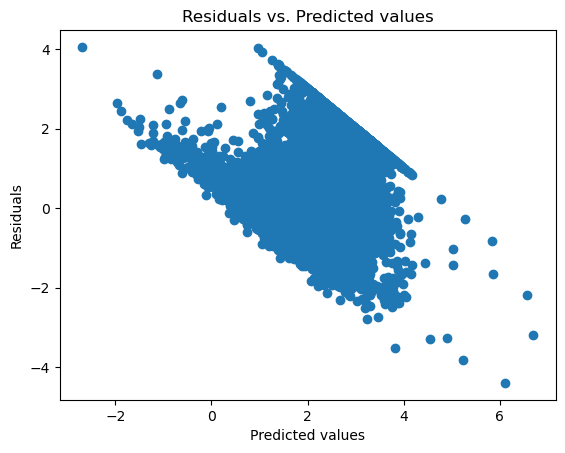

In [38]:
import matplotlib.pyplot as plt

# Plot residuals vs. predicted values
# train error
preds = model.predict(X_train)
residuals = y_train - preds  # (actual-prediction)

plt.scatter(preds, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted values")
plt.show()


**2. Independence of Errors**

**Definition:**

- The residuals (errors) should be independent of each other. This means that there should be no correlation between the errors.

**Why it's important:**

- If errors are correlated, it can indicate that some information is still hidden in the data, which violates the assumptions of the linear regression model.

**How to check:**

- **Durbin-Watson Test:** A statistical test to detect the presence of autocorrelation in the residuals.

- A Durbin-Watson statistic around 2 indicates no autocorrelation.

- Values closer to 0 suggest positive autocorrelation, while values closer to 4 suggest negative autocorrelation.

In [39]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 2.0069900308810227


**3. Homoscedasticity**

**Definition:**
  
- The residuals should have constant variance at every level of the independent variables. This means that the spread of residuals should be consistent across all levels of the independent variables.

**Why it's important:**

- If the variance of residuals is not constant (heteroscedasticity), it can affect the efficiency of the estimates and the validity of hypothesis tests.

**How to check:**

**Residual Plots:**
    
- Plot the residuals against the predicted values. The residuals should be evenly spread around zero.

**4. Normality of Residuals**

**Definition:**

- The residuals should be approximately normally distributed.

**Why it's important:**
    
- Normality of residuals is important for constructing confidence intervals and conducting hypothesis tests. If this assumption is violated, the results of these tests may not be valid.

**How to check:**

- **Histogram:** :Plot a histogram of the residuals to see if they follow a normal distribution.
    
- **Q-Q Plot:** A Quantile-Quantile plot to visually assess if the residuals follow a normal distribution.

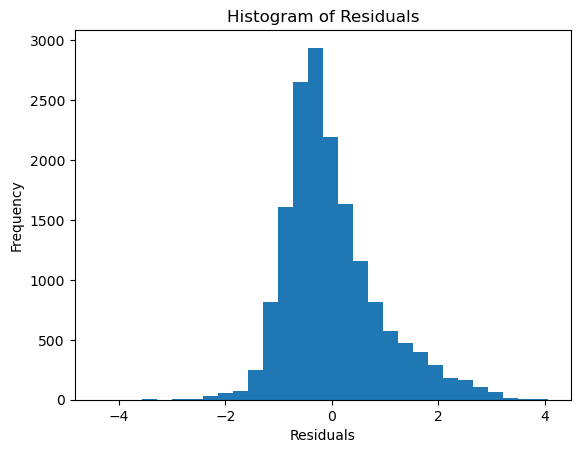

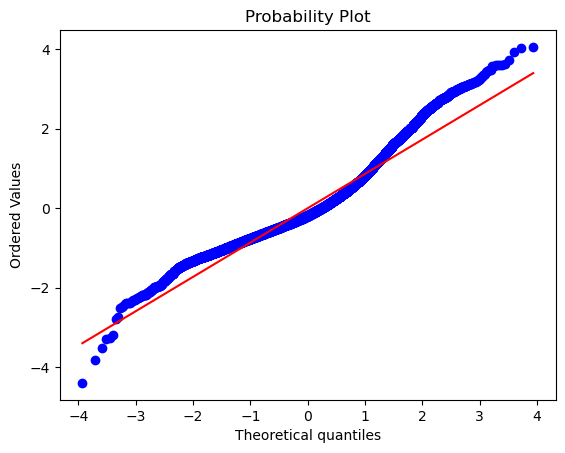

In [40]:
import scipy.stats as stats

# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


**5. Multicollinearity**

**Definition:**
  
- The independent variables should not be too highly correlated with each other. High multicollinearity means that one independent variable can be linearly predicted from the others with a substantial degree of accuracy.

**Why it's important:**
    
- High multicollinearity can cause problems in estimating the coefficients and their significance. It can make the model unstable and difficult to interpret.

**How to check:**

- Variance Inflation Factor (VIF): VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

**Step-9**

**Model evaluation**

In [42]:
y_pred = model.predict(X_test)
y_pred

array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

In [45]:
len(X_test),len(y_pred),len(y_test)

(4128, 4128, 4128)

In [51]:
print(y_pred[:5])  # Predictions
print(y_test.values[:5])  # actual

[2.41888549 2.47737599 2.46017044 2.41815573 2.78421767]
[5.    2.939 4.125 1.576 3.041]


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
df=X_test
df['Y_actual']=y_test
df['Y_predictions']=y_pred
df['Error']=df['Y_actual']-df['Y_predictions']
df['Error_square']=df['Error']**2
mse=np.sum(df['Error_square'])/len(X_test)
rmse=np.sqrt(mse)
print('Mse:',mse)
print('Rmse:',rmse)

Mse: 0.8444047034959509
Rmse: 0.9189149598825513


In [67]:
X_test

,MedInc,HouseAge,Population,AveOccup,Y_actual,Y_predictions,Error,Error_square
15712,-0.234704,-0.038032,1.010411,-1.432653,5.00000,2.418885,2.581115,6.662152
4119,0.282943,-0.115509,-0.698469,0.683662,2.93900,2.477376,0.461624,0.213097
15725,-0.278781,-0.152216,1.005730,-1.432653,4.12500,2.460170,1.664830,2.771657
14616,-0.062546,-0.133136,-1.325839,1.197766,1.57600,2.418156,-0.842156,0.709226
13238,1.045992,-0.162391,-0.703151,0.948201,3.04100,2.784218,0.256782,0.065937
...,...,...,...,...,...,...,...,...
13521,0.299587,-0.282569,-0.651651,1.077975,1.64300,1.933213,-0.290213,0.084224
16913,1.390417,-0.145384,0.898047,-1.382740,5.00001,4.008368,0.991642,0.983354
20069,-0.138627,0.159038,1.113413,-0.399452,1.23200,0.668425,0.563575,0.317617
446,-0.421058,-0.266063,1.047866,-1.357783,1.82600,2.229010,-0.403010,0.162417


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
# Predict on test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
y_pred = model.predict(X_test)
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 0.6834826107665013
MSE: 0.8444047034959509
RMSE: 0.9189149598825513
R-squared: 0.37581556067136945


**1. Mean Absolute Error (MAE)**

- **Value:** 0.6717

- **Meaning:**: MAE represents the average absolute difference between the predicted values and the actual values. In this case, your model’s predictions are, on average, off by approximately 0.67 units from the actual values.

- **Interpretation:** MAE is straightforward to interpret and provides a clear sense of the average error magnitude in the same units as the target variable.


**2. Mean Squared Error (MSE)**

- **Value:** 0.7830

- **Meaning:** MSE measures the average of the squared differences between predicted and actual values. It gives more weight to larger errors due to squaring the residuals.

- **Interpretation:** A lower MSE indicates better performance. In your case, MSE is 0.78, which suggests the average squared deviation of the predictions from the actual values.

**3. Root Mean Squared Error (RMSE)**

- **Value:** 0.8849
    
- **Meaning:** RMSE is the square root of MSE and provides the average magnitude of the prediction errors, in the same units as the target variable.

- **Interpretation:** RMSE of 0.88 means that, on average, the predictions are off by about 0.88 units. RMSE tends to be more sensitive to outliers compared to MAE because it squares the errors.

**4. R-squared (R²)**
    
- **Value:** 0.4025
    
- **Meaning:** R-squared represents the proportion of variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model explains all the variance in the target variable, and 0 indicates that the model explains none.

- **Interpretation:** An R-squared value of 0.4025 means that approximately 40.25% of the variance in the target variable is explained by the model. This suggests that the model has some predictive power but leaves a significant portion of the variance unexplained.

In [ ]:
########## All together###################
#==============Step-1 : Divide the data into X and y ====================
X = data_scaled.drop('MedHouseVal', axis=1)
y = data_scaled['MedHouseVal']

#===============Step-2: Train testv split ======================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

###############Step-3: Linear regression ========================
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
############# Step-4 : Preditions ===========================
y_pred=model.predict(X_test)

############ Step-5: Metrics =============================
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)

**Step-10**:**Save The model**


**1) Using pickle**


- Save the model

- It is similar to python read text and write text

-  open (filename.txt,'w')

-  pickle.dump(model,open('modelname.pkl','wb'))

In [70]:
import pickle
pickle.dump(model,
            open('house_model.pkl','wb'))

#Model name=model
#In which name the model is saving: house_model
# extenstion:.pkl
# wb: write in bytes

**Step-11**

**Load the model**

- open('filename.txt','r')

- pickle.load(open('modelname.pkl','rb'))

In [71]:
# Loading model to compare the results
model = pickle.load(open('house_model.pkl','rb'))
model

LinearRegression()

**Step-12**

**Predict on test data**

- always observe the model is trained by how many columns

- here the model is trained by 4 input columns

- so in order to test we need to pass 4 inputs

- A list should has 4 values

- while we are passing we need to provide list in list

**Batch predictions**

In [79]:
X_test.values
# when we are passing multiples values using a Dataframe
# is called as btach predictions
model.predict(X_test)

array([2.41888549, 2.47737599, 2.46017044, ..., 0.66842483, 2.22901036,
       1.56462426])

**Real time predictions**

In [78]:
model.predict([[100,200,300,400]])

# why list in list
# generally we will pass multiple inputs
# thin about how we are passing multilpe columns
# [c1,c2]
# [sample1,sample2]
# [[1,2,3,4],[10.20,4]]

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1113.69932722])

In [76]:
example_data = np.array([1,2,3,4]).reshape(1, -1)
model.predict(example_data)

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-9.06905869])

**2) Using Joblib**

In [80]:
import joblib

# Load the model from the .joblib file
joblib.dump(model, 'house_model.joblib')

saved_model = joblib.load('house_model.joblib')

# Use the loaded model for predictions
y_pred = saved_model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)
# y_pred compare with y_test

Predictions: [2.41888549 2.47737599 2.46017044 ... 0.66842483 2.22901036 1.56462426]
